In [1]:
import read
import matplotlib.pyplot as plt
from CentralStreamingModel.projection import generating_moments
from scipy.integrate import simps
import numpy as np
import moments2model
import seaborn as sns
sns.set_context('talk')

In [2]:
n_boxes = 14
boxsize = 2000
snapshot = 11
rm = read.Read_Mean(n_boxes, boxsize, snapshot)

In [3]:
ex = generating_moments.Expectations(rm.r, rm.v_r, rm.v_t,
                                     rm.jointpdf_rt)


In [47]:
moments_projected = generating_moments.project(ex, rm.r_perp,
                                    rm.r_parallel)

In [46]:
moments_projected_independent = generating_moments.project_independent(ex, rm.r_perp,
                                    rm.r_parallel)

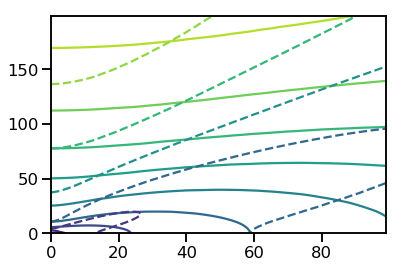

In [52]:
plt.contour(moments_projected[...,3].T)
plt.contour(moments_projected_independent[...,3].T, linestyles='dashed')

In [6]:
gaussian = moments2model.Model(rm, moments_projected, 'gaussian')

In [45]:
import importlib
importlib.reload(generating_moments)

<module 'CentralStreamingModel.projection.generating_moments' from '/home/c-cuesta/CentralStreamingModel/projection/generating_moments.py'>

In [8]:
st = moments2model.Model(rm, moments_projected, 'st')

In [53]:
st_independent = moments2model.Model(rm, moments_projected_independent, 'st')

In [42]:
measured = moments2model.Model(rm, moments_projected, 'measured')

In [10]:
gaussian.color = 'forestgreen'

Text(0.5, 0, '$s$ [Mpc/h]')

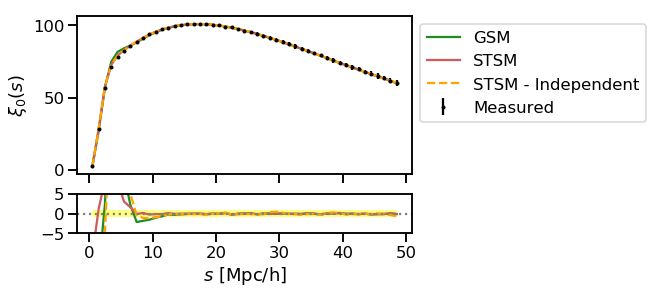

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.mono.mean,
            yerr =  rm.s_c * rm.s_c * rm.mono.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.mono,
         color = gaussian.color, label='GSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.mono,
         color = st.color, label='STSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.mono,
         color = 'orange', label='STSM - Independent',
        linestyle='dashed')
ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_0(s)$')


ax2.plot(gaussian.s_c, (gaussian.mono - rm.mono.mean)/rm.mono.std,
        color = gaussian.color )

ax2.plot(st.s_c, (st.mono - rm.mono.mean)/rm.mono.std,
        color = st.color )

ax2.plot(st.s_c, (st_independent.mono - rm.mono.mean)/rm.mono.std,
        color = 'orange', linestyle='dashed' )



ax2.axhline(y = 0., color='gray', linestyle='dotted')
ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)


ax2.set_xlabel(r'$s$ [Mpc/h]')

Text(0.5, 0, '$s$ [Mpc/h]')

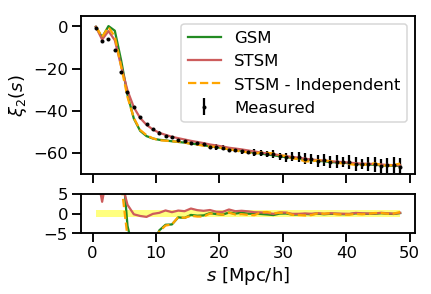

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.quad.mean,
            yerr =  rm.s_c * rm.s_c * rm.quad.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.quad,
         color = gaussian.color, label='GSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.quad,
         color = st.color, label='STSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st_independent.quad,
         color = 'orange', label='STSM - Independent', linestyle='dashed')
ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_2(s)$')


ax2.plot(gaussian.s_c, (gaussian.quad - rm.quad.mean)/rm.quad.std,
        color = gaussian.color )

ax2.plot(st.s_c, (st.quad - rm.quad.mean)/rm.quad.std,
        color = st.color )

ax2.plot(st.s_c, (st_independent.quad - rm.quad.mean)/rm.quad.std,
        color = 'orange', linestyle='dashed')



ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)
ax1.set_ylim(-70,5)


ax2.set_xlabel(r'$s$ [Mpc/h]')

Text(0.5, 0, '$s$ [Mpc/h]')

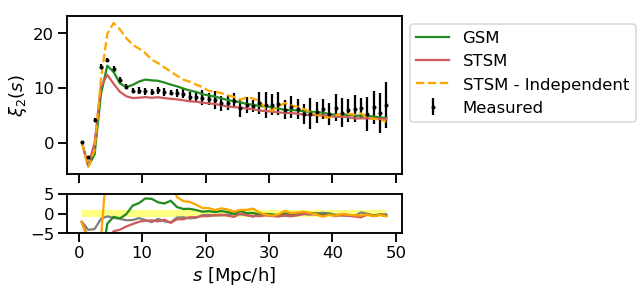

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.hexa.mean,
            yerr =  rm.s_c * rm.s_c * rm.hexa.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.hexa,
         color = gaussian.color, label='GSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st.hexa,
         color = st.color, label='STSM')

ax1.plot(st.s_c, st.s_c * st.s_c * st_independent.hexa,
         color = 'orange', label='STSM - Independent',
        linestyle='dashed')
ax1.legend(bbox_to_anchor = (1,1))
ax1.set_ylabel(r'$\xi_2(s)$')


ax2.plot(gaussian.s_c, (measured.hexa - rm.hexa.mean)/rm.hexa.std,
        color = 'gray')
ax2.plot(gaussian.s_c, (gaussian.hexa - rm.hexa.mean)/rm.hexa.std,
        color = gaussian.color )

ax2.plot(st.s_c, (st.hexa - rm.hexa.mean)/rm.hexa.std,
        color = st.color )

ax2.plot(st.s_c, (st_independent.hexa - rm.hexa.mean)/rm.hexa.std,
        color = 'orange' )



ax2.fill_between(st.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(-5.,5)


ax2.set_xlabel(r'$s$ [Mpc/h]')

In [14]:
# Since independece of the moments not good, we will need 8 functions of pair distance

Text(0, 0.5, 'First order')

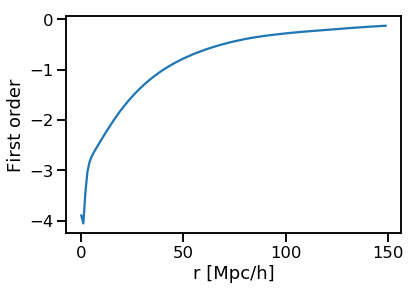

In [20]:
plt.plot(ex.moment(1,0)(rm.r), label = 'Radial')
plt.xlabel('r [Mpc/h]')
plt.ylabel('First order')

Text(0, 0.5, 'Second order')

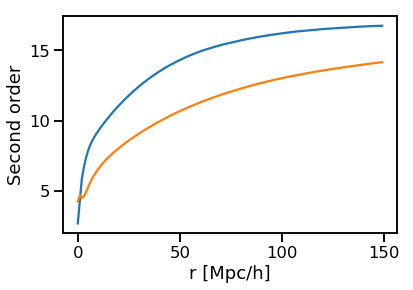

In [21]:
plt.plot(ex.central_moment(2,0)(rm.r), label = 'Radial')
plt.plot(ex.central_moment(0,2)(rm.r), label = 'Tangential')
plt.xlabel('r [Mpc/h]')
plt.ylabel('Second order')

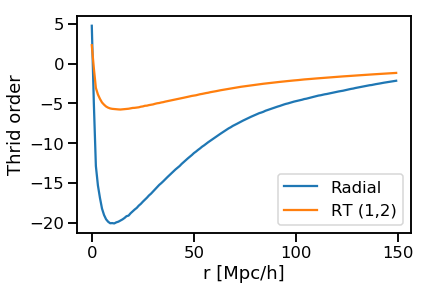

In [58]:
plt.plot(ex.central_moment(3,0)(rm.r), label = 'Radial (3,0)')
plt.plot(ex.central_moment(1,2)(rm.r), label = 'RT (1,2)')
#plt.plot(ex.covariance(1,2)(rm.r) , label = 'Sum', linestyle='dashed')

plt.xlabel('r [Mpc/h]')
plt.ylabel('Thrid order')
plt.legend()

Text(0, 0.5, 'Fourth order')

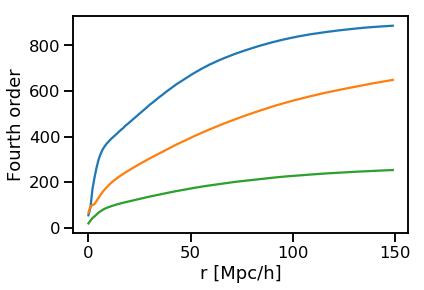

In [31]:
plt.plot(ex.central_moment(4,0)(rm.r), label = 'Radial (4,0)')
plt.plot(ex.central_moment(0,4)(rm.r), label = 'Tangnetial (0,4)')
plt.plot(ex.central_moment(2,2)(rm.r), label = 'RT (2,2)')
plt.xlabel('r [Mpc/h]')
plt.ylabel('Fourth order')
plt.legend()

## Central/Origin translation

Text(0, 0.5, 'Fourth order')

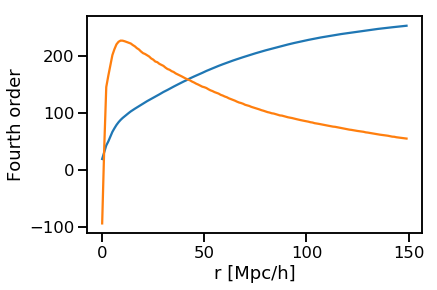

In [57]:
plt.plot(ex.central_moment(2,2)(rm.r), label = 'RT (2,2)')
plt.plot(ex.covariance(2,2)(rm.r), label = 'RT (2,2)')

plt.xlabel('r [Mpc/h]')
plt.ylabel('Fourth order')